### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [10]:
#See columns that are missing data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [11]:
# Checking for unusual values in each column, none were found
column_list = data.columns.values.tolist()
for col in data:
    print(col ,": ", data[col].unique())

destination :  ['No Urgent Place' 'Home' 'Work']
passanger :  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather :  ['Sunny' 'Rainy' 'Snowy']
temperature :  [55 80 30]
time :  ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon :  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration :  ['1d' '2h']
gender :  ['Female' 'Male']
age :  ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus :  ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children :  [1 0]
education :  ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation :  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & S

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# Car column will be removed because it is mostly empty.
# Rows with null Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 rows will be removed if the respective column is used
# toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min will be consolidated to a new column with 5, 15, or 25
def distance_consolidate(row):
    if row['toCoupon_GEQ25min'] == 1:
        return 25
    elif row['toCoupon_GEQ15min'] == 1:
        return 15
    else:
        return 5
data['distance'] = data.apply(distance_consolidate, axis = 1)
# direction_same column will be cut so direction_opp can represent both columns, as they are exact opposites
# expiration column will be changed to 2 and 24 to standardize expiration times as hours
def expiration_standardize(row):
    if row['expiration'] == '2h':
        return 2
    else:
        return 24
data['expire_duration'] = data.apply(expiration_standardize, axis = 1)
#time will be converted to 24h format to standardize timekeeping
def time_standardize(row):
    if row['time'] == '7AM':
        return 7
    elif row['time'] == '10AM':
        return 10
    elif row['time'] == '2PM':
        return 14
    elif row['time'] == '6PM':
        return 18
    else: #10PM case
        return 22
data['24h_time'] = data.apply(time_standardize, axis = 1)

In [14]:
#dropping colmuns aas described above
df = data.drop(columns=['car','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same','time','expiration'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   gender                12684 non-null  object
 6   age                   12684 non-null  object
 7   maritalStatus         12684 non-null  object
 8   has_children          12684 non-null  int64 
 9   education             12684 non-null  object
 10  occupation            12684 non-null  object
 11  income                12684 non-null  object
 12  Bar                   12577 non-null  object
 13  CoffeeHouse           12467 non-null  object
 14  CarryAway             12533 non-null  object
 15  RestaurantLessThan20  12554 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [16]:
print(df['Y'].value_counts(normalize=True))
print(df['Y'].value_counts(normalize=True)[1]*100,"% chose to accept the coupon.")

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64
56.84326710816777 % chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

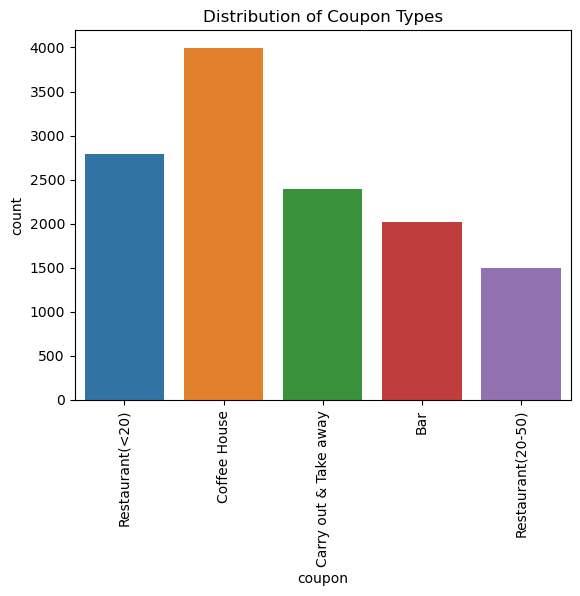

In [18]:
couponplot = sns.countplot(x='coupon',data=df)
rot = plt.xticks(rotation=90) #for readability
plt.title("Distribution of Coupon Types")
plt.savefig('images/coupon_column_by_coupon_type.png', bbox_inches='tight')

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


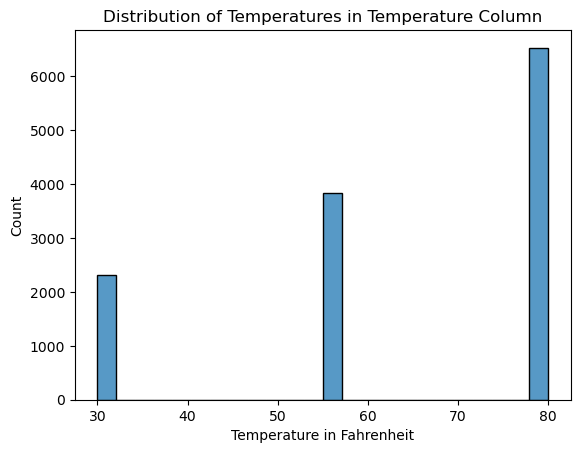

In [20]:
sns.histplot(x='temperature',data=df)
plt.xlabel("Temperature in Fahrenheit")
plt.title("Distribution of Temperatures in Temperature Column")
plt.savefig('images/temperature_column.png', bbox_inches='tight')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar_df = df[df['coupon'].str.contains("Bar")]
bar_df = bar_df.dropna(subset=['Bar']) #lose the rows with no Bar visit frequency
bar_df.head()

,destination,passanger,weather,temperature,coupon,gender,age,maritalStatus,has_children,education,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_opp,Y,distance,expire_duration,24h_time
9,No Urgent Place,Kid(s),Sunny,80,Bar,Female,21,Unmarried partner,1,Some college - no degree,...,never,never,NaN,4~8,1~3,1,0,15,24,10
13,Home,Alone,Sunny,55,Bar,Female,21,Unmarried partner,1,Some college - no degree,...,never,never,NaN,4~8,1~3,0,1,5,24,18
17,Work,Alone,Sunny,55,Bar,Female,21,Unmarried partner,1,Some college - no degree,...,never,never,NaN,4~8,1~3,1,0,25,24,7
24,No Urgent Place,Friend(s),Sunny,80,Bar,Male,21,Single,0,Bachelors degree,...,never,less1,4~8,4~8,less1,1,1,5,24,10
35,Home,Alone,Sunny,55,Bar,Male,21,Single,0,Bachelors degree,...,never,less1,4~8,4~8,less1,0,1,5,24,18


2. What proportion of bar coupons were accepted?


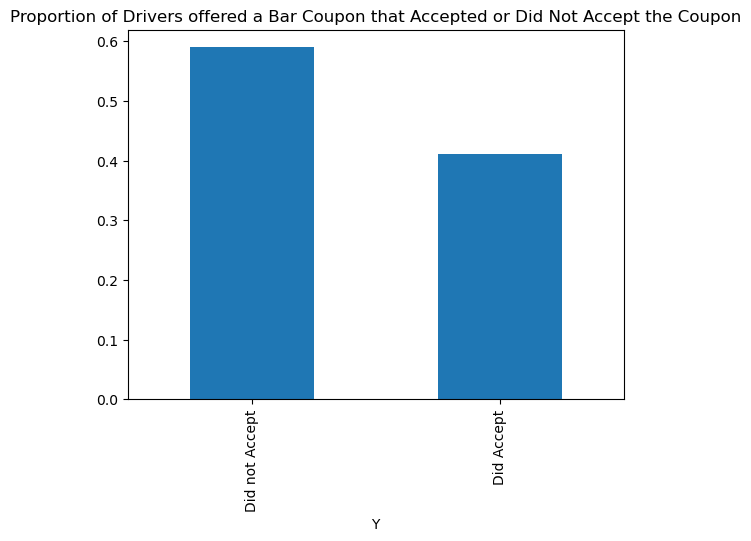

In [24]:
bar_df['Y'].value_counts(normalize=True).plot.bar().set_xticklabels(('Did not Accept', 'Did Accept'))
plt.title("Proportion of Drivers offered a Bar Coupon that Accepted or Did Not Accept the Coupon")
plt.savefig('images/barcoupon_accept.png', bbox_inches='tight')

**41\%** offered a bar coupon chose to accept it.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


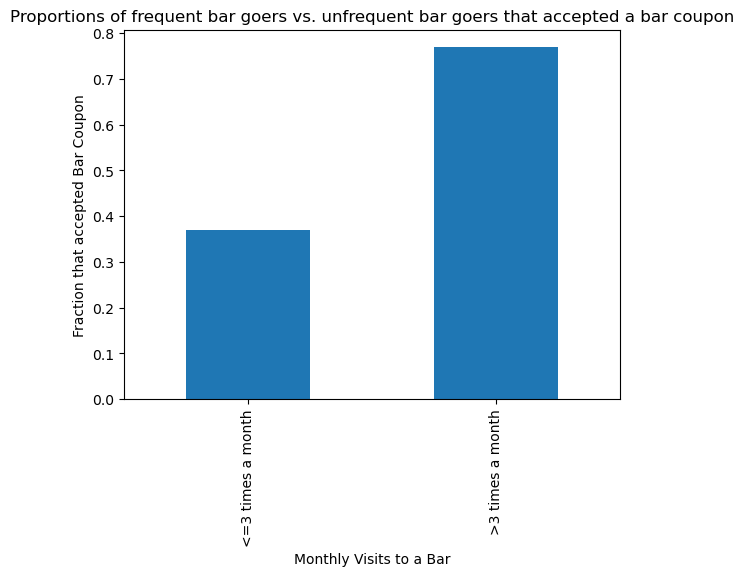

In [27]:
bar_df = bar_df.assign(frequents_bars=bar_df.apply(lambda row: row[['Bar']].isin(['4~8','gt8']),axis = 1))
bar_df.groupby(by=["frequents_bars"])['Y'].value_counts(normalize=True)[1:3].plot.bar().set_xticklabels(('<=3 times a month', '>3 times a month'))
plt.xlabel("Monthly Visits to a Bar")
plt.ylabel("Fraction that accepted Bar Coupon")
plt.title("Proportions of frequent bar goers vs. unfrequent bar goers that accepted a bar coupon")
plt.savefig('images/bar_coupon_and_bar_frequent.png', bbox_inches='tight')

Only **37%** of those who went to bars 3 times or less in a month accepted a bar coupon, not differing much from the baseline of 41%, while **76%** of those who went more often did accept a bar coupon, nearly doubling the baseline. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


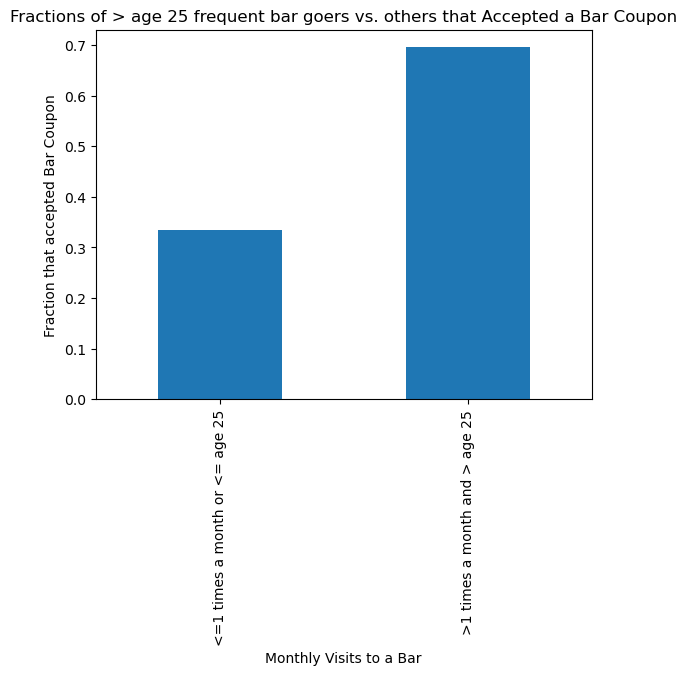

In [30]:
bar_df['frequents_bars_and_over_25'] = (~bar_df['age'].isin(['below21','21'])) & (~bar_df['Bar'].isin(['less1','never']))
bar_df.groupby(by=["frequents_bars_and_over_25"])['Y'].value_counts(normalize=True)[1:3].plot.bar().set_xticklabels(('<=1 times a month or <= age 25', '>1 times a month and > age 25'))
plt.xlabel("Monthly Visits to a Bar")
plt.ylabel("Fraction that accepted Bar Coupon")
plt.title("Fractions of > age 25 frequent bar goers vs. others that Accepted a Bar Coupon")
plt.savefig('images/bar_coupon_and_bar_frequent_over25.png', bbox_inches='tight')

Those over the age of 25 and frequent bars accepted the bar coupon **69.5%** of the time, compared to all other who accepted it just **33%** of the time.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


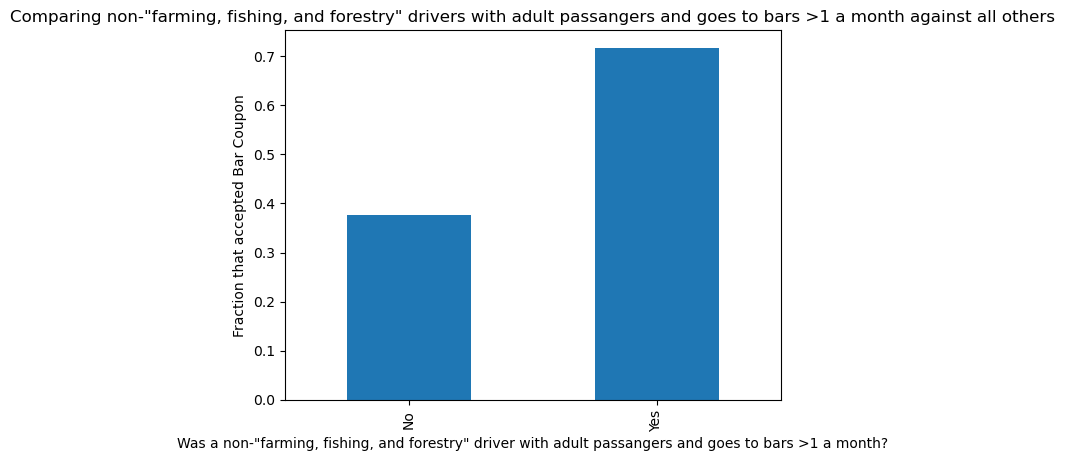

In [33]:
bar_df["frequents_bars_adult_passangers_non_fff"] = ((~bar_df['Bar'].isin(['less1','never'])) & #more than once a month
                                                     (bar_df['passanger'].isin(['Friend(s)','Partner'])) & #adult passangers
                                                     (~bar_df['occupation'].isin(['Farming Fishing & Forestry']))) # non-farming,fishing,forest
bar_df.groupby(by=["frequents_bars_adult_passangers_non_fff"])['Y'].value_counts(normalize=True)[1:3].plot.bar().set_xticklabels(('No', 'Yes'))
plt.xlabel("Was a non-\"farming, fishing, and forestry\" driver with adult passangers and goes to bars >1 a month?")
plt.ylabel("Fraction that accepted Bar Coupon")
plt.title("Comparing non-\"farming, fishing, and forestry\" drivers with adult passangers and goes to bars >1 a month against all others")
plt.savefig('images/problem5.png', bbox_inches='tight')

Non-farming, fishing, or forestry employees with adult passengers and who went to bars more than once a month accepted bar coupons **71.8%** of the time, while others accepted just **37.7%** of the time.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



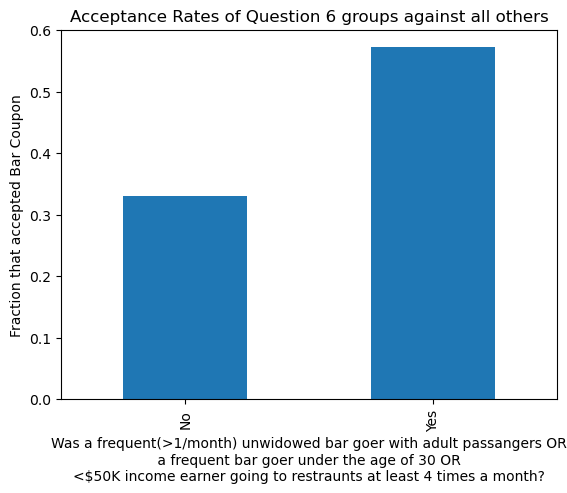

In [36]:
bar_df["target_population"] = (((~bar_df['Bar'].isin(['less1','never']))& #goes to bars more than once a month
        (((bar_df['passanger'].isin(['Friend(s)','Partner']))& (~bar_df['maritalStatus'].isin(['Widowed']))) #adult passanger(s) and not widowed
        |
        (bar_df['age'].isin(['21','26','below21'])))) #under the age of 30
    |
    (bar_df['RestaurantLessThan20'].isin(['4~8','gt8']) & (bar_df['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))))
    #goes to cheap restraunts 4 or more times a month, and income less than $50K
bar_df.groupby(by=["target_population"])['Y'].value_counts(normalize=True)[1:3].plot.bar().set_xticklabels(('No', 'Yes'))
plt.xlabel("Was a frequent(>1/month) unwidowed bar goer with adult passangers OR\n a frequent bar goer under the age of 30 OR \n<$50K income earner going to restraunts at least 4 times a month?")
plt.ylabel("Fraction that accepted Bar Coupon")
plt.title("Acceptance Rates of Question 6 groups against all others")
plt.savefig('images/problem6.png', bbox_inches='tight')

Drivers that went to bars more than once a month, were not widowed and had adult passengers, plus under 30 drivers that went to bars more than once a month plus drivers that went to cheap restraunts more than 4 times a month with an income less than 50K put together accepted a bar coupon **57.2%** of the time compared to **33%** acceptance from those who did not fall under any of those categories.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In general, 41% of people offered bar coupons were accepted, and 59% didn't accept, so this forms the baseline for bar coupon acceptance. In our observations, 76% of frequent (more than 3 times a month) bar goers accepted coupons, far above the 41% norm. 

The next observation put the coupon acceptance rate of over 25 drivers that went more than once a month to bars at 69.5%, a little less than >3 monthly bar visitors, so age does not seem to be major factor. 

The next observation targetting non-forestry, fishing, or farming drivers that had an adult passenger and themselves went to bars at least once a month put their acceptance rate at 71.8%, not a huge change from 76%. 

The final observation, putting 3 groups (non-widow drivers that frequented bars with adult passengers, frequent under 30 bar goers, and low income drivers tha frequented cheap restraunts) together presented a 57% coupon acceptance rate. 

Given the obseravtions, the strongest indicator of bar coupon acceptance seems to be "going frequently to bars." This makes sense, since those who frequently go to bars need to alter their behaviors less to take advantage of the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [41]:
coffee_df = df[df['coupon'].str.contains("Coffee House")] #get only rows where Coffeehouse coupons were offered
coffee_df = coffee_df.dropna(subset=['CoffeeHouse']) #lose the rows with no Coffee House visit frequency
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3924 entries, 1 to 12681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3924 non-null   object
 1   passanger             3924 non-null   object
 2   weather               3924 non-null   object
 3   temperature           3924 non-null   int64 
 4   coupon                3924 non-null   object
 5   gender                3924 non-null   object
 6   age                   3924 non-null   object
 7   maritalStatus         3924 non-null   object
 8   has_children          3924 non-null   int64 
 9   education             3924 non-null   object
 10  occupation            3924 non-null   object
 11  income                3924 non-null   object
 12  Bar                   3908 non-null   object
 13  CoffeeHouse           3924 non-null   object
 14  CarryAway             3888 non-null   object
 15  RestaurantLessThan20  3895 non-null   obje

In [42]:
print(coffee_df['Y'].value_counts())

Y
0    1962
1    1962
Name: count, dtype: int64


It is important to establish baseline, which is that exactly 50% of drivers interacted with for a coffeehouse coupon accepted the coupon, while 50% did not.

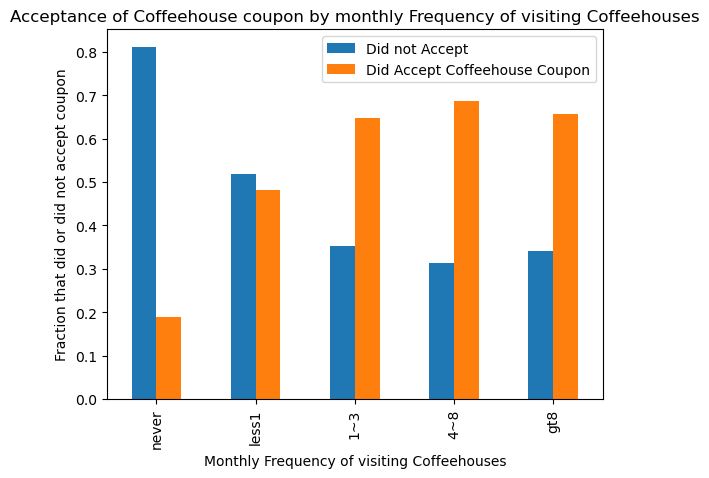

In [44]:
coffee_percent_df = coffee_df.groupby('CoffeeHouse')['Y'].value_counts(normalize=True)
sorter = ['never', 'less1', '1~3', '4~8', 'gt8']
coffee_percent_df.unstack().reindex(sorter).plot.bar().legend(["Did not Accept","Did Accept Coffeehouse Coupon"])
plt.xlabel("Monthly Frequency of visiting Coffeehouses")
plt.ylabel("Fraction that did or did not accept coupon")
plt.title("Acceptance of Coffeehouse coupon by monthly Frequency of visiting Coffeehouses")
plt.savefig('images/coffee_coupon_and_coffee_frequency.png', bbox_inches='tight')

Seperating out acceptance of coffeehouse coupons by frequency of visiting sees that acceptance rate grows from 0.2 at 'never' to 0.6 at '1\~3' and then stays around there at the '4\~8' and 'greater than 8' frequencies of visiting coffeehouses, indicating there is a ceiling on how likely a person is to accept a coffeehouse coupon even when they go more frequently.

In the next chart, the relation between time of day and acceptance rate is explored, since drivers in the early morning may be more receptive to coupons:

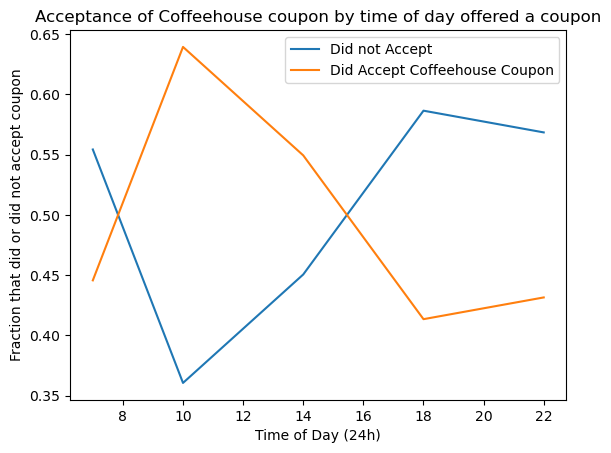

In [47]:
coffee_percent_df = coffee_df.groupby('24h_time')['Y'].value_counts(normalize=True)
coffee_percent_df.unstack().plot.line().legend(["Did not Accept","Did Accept Coffeehouse Coupon"])
plt.xlabel("Time of Day (24h)")
plt.ylabel("Fraction that did or did not accept coupon")
plt.title("Acceptance of Coffeehouse coupon by time of day offered a coupon")
plt.savefig('images/coffee_coupon_and_time_of_day.png', bbox_inches='tight')

Interestingly, the 7 o'clock has acceptance rates similar to evening times, while 10 followed by 14 o'clocks have the highest acceptance rates. 10 makes sense, as it is still morning, and afternoon coffee isn't unheard of. Finally, people try to avoid large amounts of caffine in the evening, so the evening rates make sense.

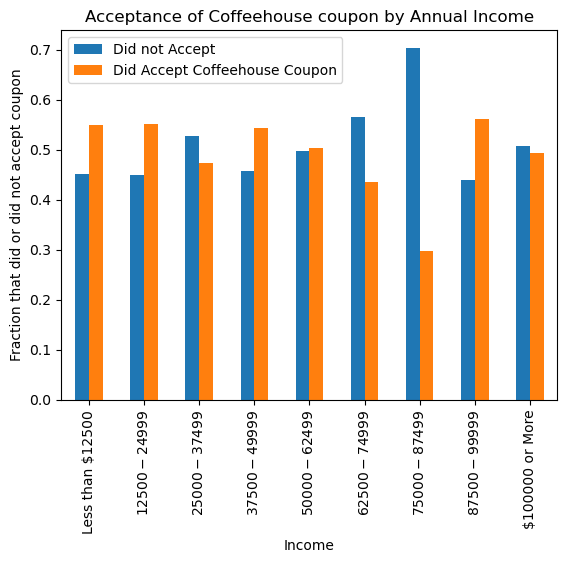

In [49]:
coffee_percent_df = coffee_df.groupby('income')['Y'].value_counts(normalize=True)
sorter = ['Less than $12500','$12500 - $24999', '$25000 - $37499','$37500 - $49999',  '$50000 - $62499','$62500 - $74999', '$75000 - $87499','$87500 - $99999', '$100000 or More' ]
coffee_percent_df.unstack().reindex(sorter).plot.bar().legend(["Did not Accept","Did Accept Coffeehouse Coupon"])
plt.xlabel("Income")
plt.ylabel("Fraction that did or did not accept coupon")
plt.title("Acceptance of Coffeehouse coupon by Annual Income")
plt.savefig('images/coffee_coupon_and_income.png', bbox_inches='tight')

Acceptance of coffeehouse coupons dips to a low at the \\$75000 to \\$87499  level, then jumps back up.

Now, the "target group" in accordance to the observations above, offering coupons at 10 am to people who go to coffeehouses more than once a month and do not have an income of \\$75000 - \\$87499:

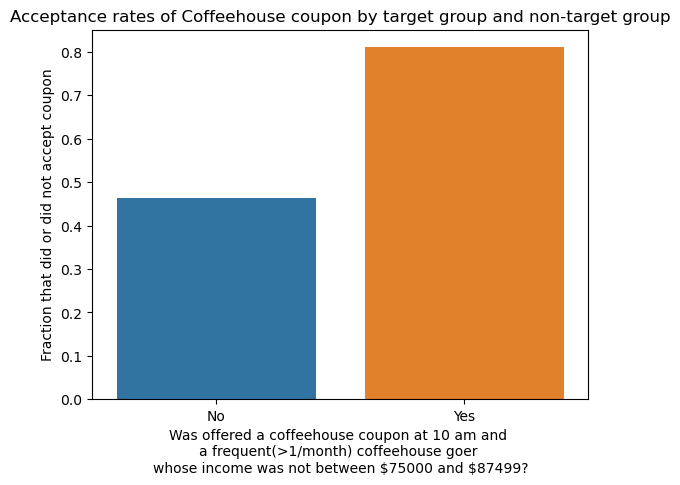

In [52]:
coffee_df['target_population'] = ((~coffee_df['CoffeeHouse'].isin(['never','less1'])) & #goes more than once a month to coffee houses
                                (coffee_df['24h_time'] == 10) & #coupon offered at 10am
                                (~coffee_df['income'].isin(['$75000 - $87499']))) #income is NOT $75000 - $87499
target_pop_df = coffee_df.groupby(by=["target_population"])['Y'].value_counts(normalize=True)[1:3]
target_pop_df = target_pop_df.reset_index(level=[0,1])
sns.barplot(x=target_pop_df.index, y='proportion', data = target_pop_df).set_xticklabels(('No', 'Yes'))
plt.xlabel("Was offered a coffeehouse coupon at 10 am and \na frequent(>1/month) coffeehouse goer \nwhose income was not between \$75000 and \$87499?")
plt.ylabel("Fraction that did or did not accept coupon")
plt.title("Acceptance rates of Coffeehouse coupon by target group and non-target group")
plt.savefig('images/target_group.png', bbox_inches='tight')

Putting these 3 oberservations together, it can be observed that drivers that went to coffeehouses more than once a month that were not in the '\\$75000 - \\$87499' range and approached at around 10 am in the morning were very receptive to coffeehouse coupons, with 81% doing so, a higher rate than each individually, meaning predictive value was gained by observing these columns together.

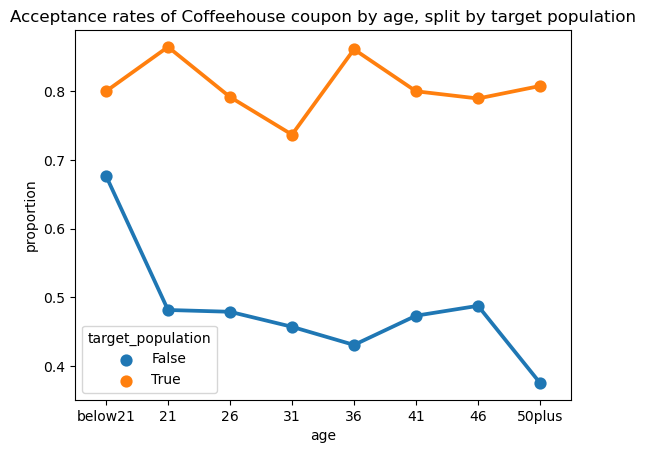

In [54]:
sorter = ['below21','21','26','31','36','41','46','50plus'] #ordering the age strings

age_df = coffee_df.groupby(by=["target_population","age"])['Y'].value_counts(normalize=True)
age_df = age_df.reset_index(level=[0,1]).reset_index()
age_df = age_df[age_df['Y']==1]
ax = sns.pointplot(x='age', y='proportion', data=age_df,hue='target_population', order=sorter)
plt.title("Acceptance rates of Coffeehouse coupon by age, split by target population")
plt.savefig('images/target_group_and_age.png', bbox_inches='tight')

Now, graphing coupon acceptance rates by age indicates that within the population defined above (orange), coupon acceptance rates do not vary much, but for the people that were not in that population (blue), acceptance rates dropped with age. This indicates an opportunity at young ages to offer them coupons to get them going to coffeehouses more often, moving them from the infrequent drinkers group (blue) into the frequent drinker group (orange), turning them into lifelong drinkers of coffee whose rates of continuing to drink coffee and accepting more coffeehouse coupons do not drop as they age.

In conclusion, to have high coffeehouse coupon acceptance rates, and thus to make the best use of time giving out coupons, give them out at 10am, give them to all young people in hopes of ~~hooking them on caffine~~ building a habit of drinking coffee and going to coffeehouses. Should this be accomplished, they will remain loyal coffee drinkers into old age. Similarly, offer coffeehouse coupons to frequent visitors of coffeehouses, as the data shows they accept coupons for coffeehouses at a very high rate.